# Introduction

L'agence "Santé publique France" a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation.

La plupart des maladies comme l'hypertension artérielle, le diabète, le cancer et autres sont due en majorité à une mauvaise alimentation

Or en faisant un choix judicieux des produits de consommation, la population peux s'autoguérir ou se prévenir contre ces maladies.

Laplupart des produits ne portent pas les indices de score de nutrition.
Nous allons donc concevoir une application permettant prédire a partir des données mises sur l'etiquette, le score nutritionelle des produits qui n'en portent pas.

Nous avons à cette fin un jeu de donneés d'openfoodfact rassemblant les informations générales sur les produits, les ingrédients qui les composent et leurs additifs éventuels, et des informations nutritionnelles.


Premièrement, nous allons nettoyer notre jeu de données des erreurs éventuels qu'il contient, puis nous passerons à l'analyse exploratoire de ces données.

# Importation des librairies et du jeu de données

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 162)

In [3]:
data=pd.read_csv("/content/drive/MyDrive/fr.openfoodfacts.org.products.csv", sep='\t')
df=data.copy()
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ] [ vegetable-oil -

# Informations sur la base de données

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    code                                        object 
 1    url                                         object 
 2    creator                                     object 
 3    created_t                                   object 
 4    created_datetime                            object 
 5    last_modified_t                             object 
 6    last_modified_datetime                      object 
 7    product_name                                object 
 8    generic_name                                object 
 9    quantity                                    object 
 10   packaging                                   object 
 11   packaging_tags                              object 
 12   brands                                      object 
 13   brands_tags 

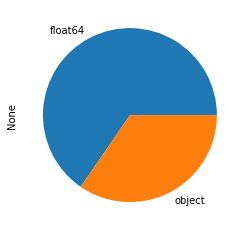

In [5]:
df.dtypes.value_counts().plot(kind='pie')

In [6]:
columns=list(df.columns)

In [7]:
df.shape

(320772, 162)

#Valeurs manquantes

pourcentages des valeurs  manquantes classés par ordre 

In [8]:

percent=list(df.isnull().sum()*100/df.shape[0])
dic={}
nan=[]
for col, percent in zip(columns, percent):
   dic[col]=round(percent)
nan_df=pd.DataFrame(list(dic.items()),
                   columns=['Columns', 'NaN_Percent'])
   #print(col, f' {round(percent)} %')
df_nan=nan_df.sort_values(by = 'NaN_Percent', ascending=False)
df_nan.head(20)

,Columns,NaN_Percent
161,water-hardness_100g,100
104,glucose_100g,100
93,oleic-acid_100g,100
64,energy-from-fat_100g,100
94,elaidic-acid_100g,100
95,gondoic-acid_100g,100
96,mead-acid_100g,100
97,erucic-acid_100g,100
98,nervonic-acid_100g,100
103,sucrose_100g,100


Affichage du graphe des valeurs manquantes

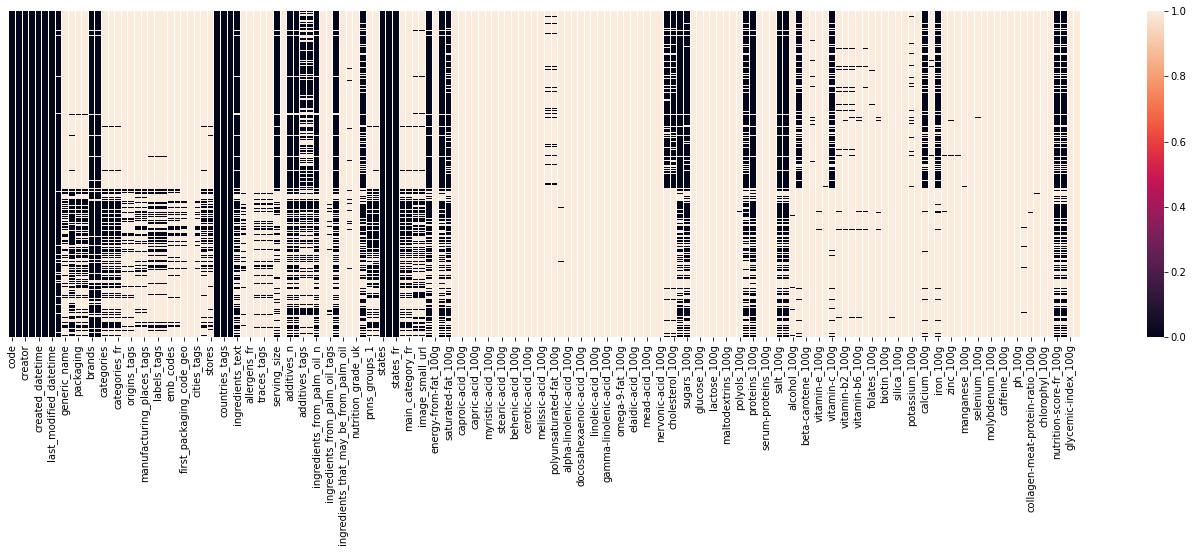

In [ ]:
plt.figure(figsize=(24, 6))
sns.heatmap(data = df.isnull(),  yticklabels=False)
#plt.xticks(rotation=70)
plt.show()

In [ ]:
print(f"Notre jeu de données contient {round(np.sum(df.isnull().sum().values)*100/(df.shape[0]*df.shape[1]), 1)}% de valeurs manquantes")

Notre jeu de données contient 76.2% de valeurs manquantes


### 0-Croisement des colonnes entre elles

Ici on veux vérifier si on peux croiser certaines colonnes entre elles, 
Voir si sur une meme ligne, si une variable est renseignée et l'autre non.

In [9]:
def fr(y, z):
  e="yes"
  a=df[y].isnull().values
  b=df[z].notna().values
  for i, j  in zip(a, b):
        if(i==j):
          pass
        else:
          e='no'
          break
  if e=='no':
      return None
  else:
    return f"colonnes {y, z} à croiser"
      

In [ ]:
print(len(df.columns))
liste=[]
for  a in df.columns:
  for b in df.columns:
    if a!=b:
      result=fr(a, b)
      if result!=None:
        print(result)

162
colonnes ('code', 'cities') à croiser
colonnes ('code', 'behenic-acid_100g') à croiser
colonnes ('code', 'dihomo-gamma-linolenic-acid_100g') à croiser
colonnes ('url', 'cities') à croiser
colonnes ('url', 'behenic-acid_100g') à croiser
colonnes ('url', 'dihomo-gamma-linolenic-acid_100g') à croiser
colonnes ('last_modified_t', 'no_nutriments') à croiser
colonnes ('last_modified_t', 'ingredients_from_palm_oil') à croiser
colonnes ('last_modified_t', 'ingredients_that_may_be_from_palm_oil') à croiser
colonnes ('last_modified_t', 'nutrition_grade_uk') à croiser
colonnes ('last_modified_t', 'butyric-acid_100g') à croiser
colonnes ('last_modified_t', 'caproic-acid_100g') à croiser
colonnes ('last_modified_t', 'lignoceric-acid_100g') à croiser
colonnes ('last_modified_t', 'cerotic-acid_100g') à croiser
colonnes ('last_modified_t', 'melissic-acid_100g') à croiser
colonnes ('last_modified_t', 'elaidic-acid_100g') à croiser
colonnes ('last_modified_t', 'mead-acid_100g') à croiser
colonnes ('

En observant les colonnes  qui remplisent cette condition, il serrait impossible de les croiser car laplupart ne sont pas de meme types ni renseignés dans le meme format. On passe donc à la supression des variables ayant   plus de 80% de valeurs  manquantes

### 1- Supression des Colonnes  ayant jusquà plus de 80% de valeurs manquantes

In [10]:
nan=[]
for i,j in dic.items(): 
  if j>=80:
    print(i)
    nan.append(i)
nan, len(nan) 

generic_name
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
allergens
allergens_fr
traces
traces_tags
traces_fr
no_nutriments
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
energy-from-fat_100g
butyric-acid_100g
caproic-acid_100g
caprylic-acid_100g
capric-acid_100g
lauric-acid_100g
myristic-acid_100g
palmitic-acid_100g
stearic-acid_100g
arachidic-acid_100g
behenic-acid_100g
lignoceric-acid_100g
cerotic-acid_100g
montanic-acid_100g
melissic-acid_100g
monounsaturated-fat_100g
polyunsaturated-fat_100g
omega-3-fat_100g
alpha-linolenic-acid_100g
eicosapentaenoic-acid_100g
docosahexaenoic-acid_100g
omega-6-fat_100g
linoleic-acid_100g
arachidonic-acid_100g
gamma-linolenic-acid_100g
dihomo-gamma-linolenic-acid_100g
omega-9-fat_100g
oleic-acid_100

(['generic_name',
  'origins',
  'origins_tags',
  'manufacturing_places',
  'manufacturing_places_tags',
  'labels',
  'labels_tags',
  'labels_fr',
  'emb_codes',
  'emb_codes_tags',
  'first_packaging_code_geo',
  'cities',
  'cities_tags',
  'purchase_places',
  'stores',
  'allergens',
  'allergens_fr',
  'traces',
  'traces_tags',
  'traces_fr',
  'no_nutriments',
  'ingredients_from_palm_oil',
  'ingredients_from_palm_oil_tags',
  'ingredients_that_may_be_from_palm_oil',
  'ingredients_that_may_be_from_palm_oil_tags',
  'nutrition_grade_uk',
  'energy-from-fat_100g',
  'butyric-acid_100g',
  'caproic-acid_100g',
  'caprylic-acid_100g',
  'capric-acid_100g',
  'lauric-acid_100g',
  'myristic-acid_100g',
  'palmitic-acid_100g',
  'stearic-acid_100g',
  'arachidic-acid_100g',
  'behenic-acid_100g',
  'lignoceric-acid_100g',
  'cerotic-acid_100g',
  'montanic-acid_100g',
  'melissic-acid_100g',
  'monounsaturated-fat_100g',
  'polyunsaturated-fat_100g',
  'omega-3-fat_100g',
  'alph

Certaines colonnes restent utile à la classification, on va donc les garder

In [11]:
col_imp=[
       "alcohol_100g",  "potassium_100g","magnesium_100g", 
       "caffeine_100g", "omega-3-fat_100g","iron_100g"]
nan=[i for i in nan if  i not in col_imp]
len(nan)

103

In [12]:
df.drop(columns=nan, inplace=True)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,countries,countries_tags,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,fat_100g,saturated-fat_100g,omega-3-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,iron_100g,magnesium_100g,caffeine_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2243.0,28.57,28.57,NaN,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,NaN,0.0,0.0214,NaN,0.000,0.00129,NaN,NaN,14.0,14.0
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,NaN,Torn & Glasser,torn-glasser,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1941.0,17.86,0.00,NaN,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,NaN,0.0,0.0000,NaN,0.071,0.00129,NaN,NaN,0.0,0.0
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,NaN,Grizzlies,grizzlies,NaN,NaN,NaN,US,en:united-states,États-Unis,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,NaN,0.0,0.0,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,2540.0,57.14,5.36,NaN,NaN,NaN,17.86,3.57,7.1,17.86,1.22428,0.482,NaN,NaN,NaN,NaN,0.143,0.00514,NaN,NaN,12.0,12.0
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,NaN,Bob's Red Mill,bob-s-red-mill,NaN,NaN,NaN,US,en:united-states,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1552.0,1.43,NaN,NaN,NaN,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
print(f"Notre jeu de données contient maintenant {round(np.sum(df.isnull().sum().values)*100/(df.shape[0]*df.shape[1]), 1)}% de valeurs manquantes")

Notre jeu de données contient maintenant 38.8% de valeurs manquantes


### 2-Mise à 0

Les colonnes ayant _100g dans le nom de leur variables ont été rempli par NaN à la plca de 0 car probablement, si l'ingrédient n'y est pas, on laisse la case vide, ce qui se transforme en NaN. On va donc remettre à 0 ces valeurs manquantes

In [14]:
gcol=[i for i in df.columns if "100g" in i]
len(gcol), gcol

(22,
 ['energy_100g',
  'fat_100g',
  'saturated-fat_100g',
  'omega-3-fat_100g',
  'trans-fat_100g',
  'cholesterol_100g',
  'carbohydrates_100g',
  'sugars_100g',
  'fiber_100g',
  'proteins_100g',
  'salt_100g',
  'sodium_100g',
  'alcohol_100g',
  'vitamin-a_100g',
  'vitamin-c_100g',
  'potassium_100g',
  'calcium_100g',
  'iron_100g',
  'magnesium_100g',
  'caffeine_100g',
  'nutrition-score-fr_100g',
  'nutrition-score-uk_100g'])

In [15]:
for i in gcol:
  df.loc[df[i].isnull(), i]=0
print(f"Notre jeu de données contient maintenant {round(np.sum(df.isnull().sum().values)*100/(df.shape[0]*df.shape[1]), 1)}% de valeurs manquantes")

Notre jeu de données contient maintenant 20.1% de valeurs manquantes


### 3-Supression des colonnes inutiles à la classification

D'autres sont inutiles à la classification, on va donc les supprimer

In [16]:
col_inu=['code','url','creator','created_t','created_datetime',
  'last_modified_t','last_modified_datetime','packaging','packaging_tags',
  'brands','brands_tags', 'categories','categories_tags', "categories_fr",'image_url',
  'image_small_url','nutrition-score-uk_100g', 'generic_name', 'quantity','manufacturing_places', 'manufacturing_places_tags',
'labels_tags', 'labels_fr', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_fr', 'additives', 'additives_tags', 'additives_fr',
'main_category', 'main_category_fr','trans-fat_100g',
        'iron_100g',"serving_size", "states", "states_tags", 'states_fr', 'nutrition-score-fr_100g']

In [17]:
col_inu=[i for i in col_inu if not i in nan]
len(col)

19

In [18]:
df.drop(columns=col_inu, inplace=True)
df.head()

,product_name,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,omega-3-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,magnesium_100g,caffeine_100g
0,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0000,0.0,0.000,0.0,0.0
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,d,NaN,NaN,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0,0.0214,0.0,0.000,0.0,0.0
2,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,b,NaN,NaN,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0000,0.0,0.071,0.0,0.0
3,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,d,NaN,NaN,2540.0,57.14,5.36,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482,0.0,0.0,0.0000,0.0,0.143,0.0,0.0
4,Organic Polenta,Organic polenta,0.0,0.0,0.0,NaN,NaN,NaN,1552.0,1.43,0.00,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000,0.0,0.0,0.0000,0.0,0.000,0.0,0.0


In [19]:
df.shape

(320772, 26)

In [20]:
print(f"Notre jeu de données contient {round(np.sum(df.isnull().sum().values)*100/(df.shape[0]*df.shape[1]), 1)}% de valeurs manquantes")

Notre jeu de données contient 10.3% de valeurs manquantes


### 4- Imputation des autres valeurs manquantes par la mediane 

In [21]:
for col in list(df.columns):
   if df[col].dtypes=='float64':
       df[col].fillna(df[col].median(), inplace=True)
   else:
     df[col].fillna(str(df[col].mode()[0]), inplace=True)
df.isnull().sum()

product_name                               0
ingredients_text                           0
additives_n                                0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
                                          ..
vitamin-c_100g                             0
potassium_100g                             0
calcium_100g                               0
magnesium_100g                             0
caffeine_100g                              0
Length: 26, dtype: int64

In [22]:
df.head()

,product_name,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,omega-3-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,magnesium_100g,caffeine_100g
0,Farine de blé noir,"Carbonated water, natural flavor.",1.0,0.0,0.0,d,unknown,unknown,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0000,0.0,0.000,0.0,0.0
1,Banana Chips Sweetened (Whole),"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,0.0,d,unknown,unknown,2243.0,28.57,28.57,0.0,0.018,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0,0.0214,0.0,0.000,0.0,0.0
2,Peanuts,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,0.0,b,unknown,unknown,1941.0,17.86,0.00,0.0,0.000,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0,0.0000,0.0,0.071,0.0,0.0
3,Organic Salted Nut Mix,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,0.0,d,unknown,unknown,2540.0,57.14,5.36,0.0,0.000,17.86,3.57,7.1,17.86,1.22428,0.482,0.0,0.0,0.0000,0.0,0.143,0.0,0.0
4,Organic Polenta,Organic polenta,0.0,0.0,0.0,d,unknown,unknown,1552.0,1.43,0.00,0.0,0.000,77.14,0.00,5.7,8.57,0.00000,0.000,0.0,0.0,0.0000,0.0,0.000,0.0,0.0


In [23]:
df.shape

(320772, 26)

# Reecrivons certaines variables

In [24]:
for col in df.select_dtypes('object'):
  liste=[]
  for i in df[col]:
    try:
      i=i.split(',')[0]
      i=i.split(';')[0]
    except:
      pass
    liste.append(i)
  df[col]=liste

In [25]:
df['nutrition_grade_fr'].value_counts().index

Index(['d', 'c', 'e', 'a', 'b'], dtype='object')

# Doublons:

Deux produits ne peuvent avoir le meme nom et le meme nutriscore, donc on supprime ces doublons

In [27]:
df[["product_name", 'nutrition_grade_fr']].duplicated(keep=False).sum()

149090

Supression

In [28]:
df=df.drop_duplicates(subset=['product_name', 'nutrition_grade_fr'])
print(f'Les dimensions de la dataframe apres supression des doublons: ', df.shape)

Les dimensions de la dataframe apres supression des doublons:  (201252, 26)


# Valeurs aberrantes

### Observons certaines variables 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


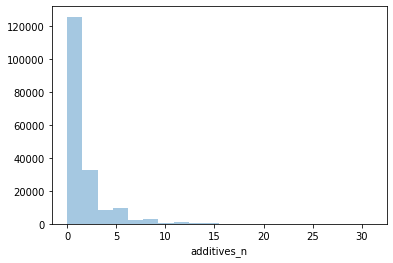

31.0


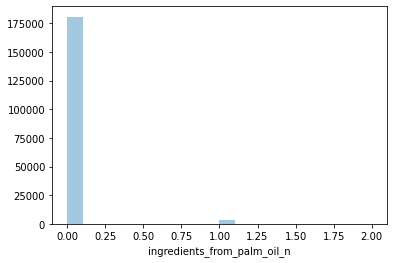

2.0


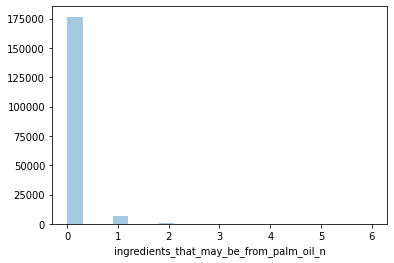

6.0


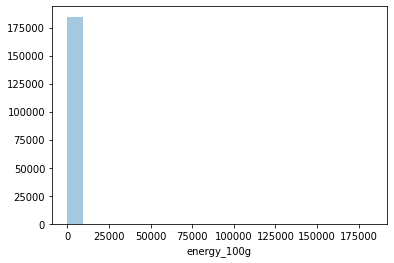

182764.0


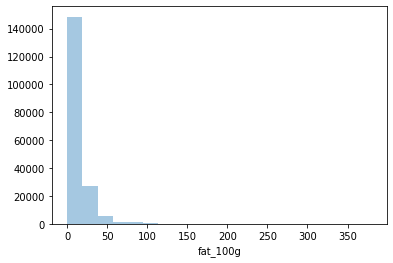

380.0


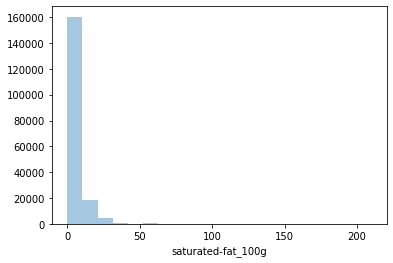

210.0


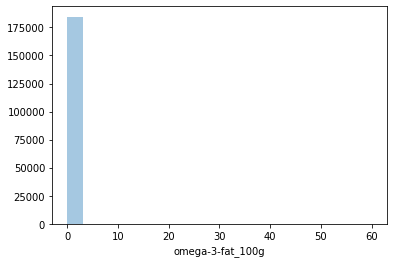

60.0


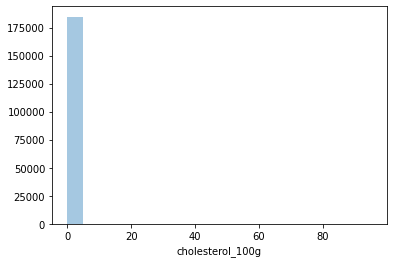

95.238


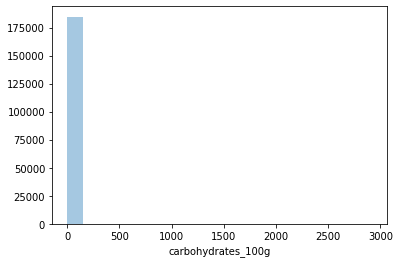

2916.67


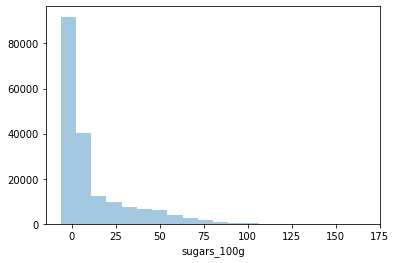

166.67


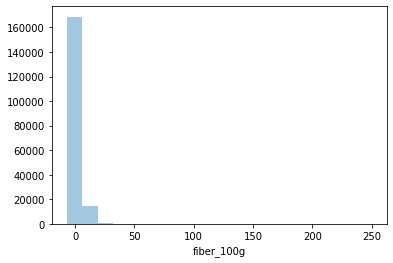

250.0


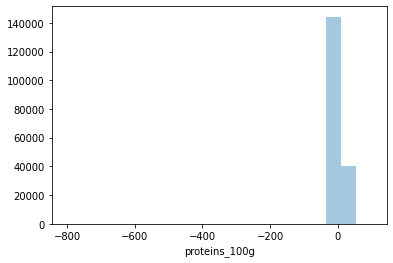

100.0


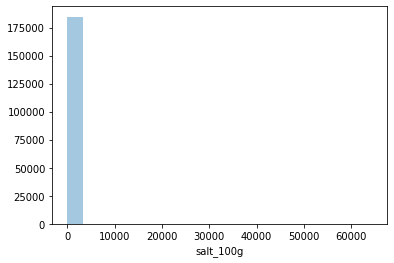

64312.8


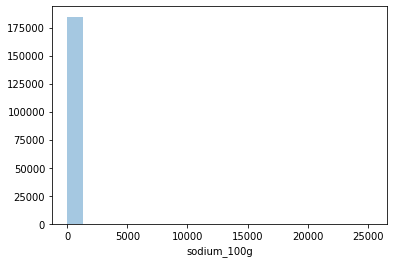

25320.0


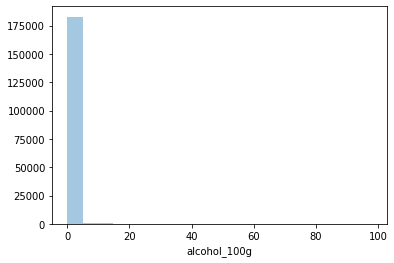

97.9


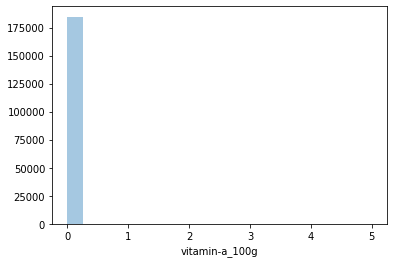

5.0


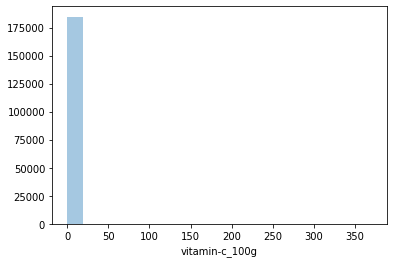

370.3704


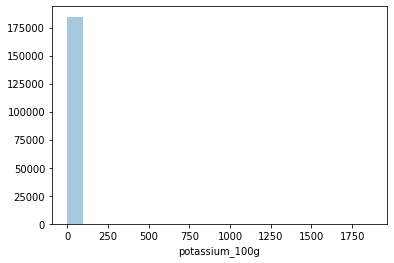

1870.37


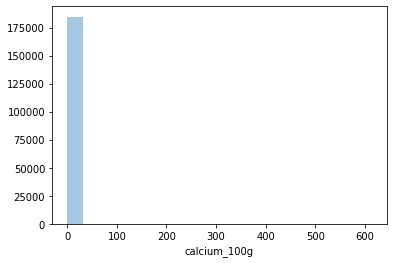

613.636


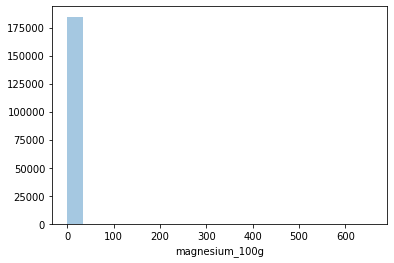

657.143


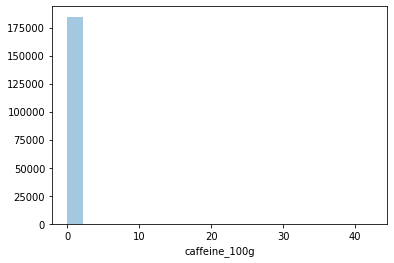

42.28


In [ ]:
for col in df.select_dtypes('float'):
  sns.distplot(df[col], bins=20, kde=False)
  plt.show()
  print(df[col].max())

la variable energy_100g a des valeurs concetrées entre 0 et 0.2*1e6, elle est censé etre  inférieur à 100 g. Les valeus=rs ont été prises probablement dans la mauvaise unité c'est à dire en kilocaloré. Nous allons donc les rammener en grammes

Mais observons d'abord le graphe des variables quantitatives

In [ ]:
df["energy_100g"]=df["energy_100g"]/9000
df["energy_100g"].max(), df["energy_100g"].mean()

(20.307111111111112, 0.1013942842133653)

### Taitement de ces colonnes

In [29]:
df.isnull().sum()

product_name                               0
ingredients_text                           0
additives_n                                0
ingredients_from_palm_oil_n                0
ingredients_that_may_be_from_palm_oil_n    0
                                          ..
vitamin-c_100g                             0
potassium_100g                             0
calcium_100g                               0
magnesium_100g                             0
caffeine_100g                              0
Length: 26, dtype: int64

Les variables terminées par _100g ne peuvent avoir des valeurs supérieurs à 100

In [30]:
colonnes=[i for i in df.columns if '100g' in i]
colonnes=[i for i in colonnes if i not in ["nutrition-score-fr_100g",]]
len(colonnes), colonnes

(18,
 ['energy_100g',
  'fat_100g',
  'saturated-fat_100g',
  'omega-3-fat_100g',
  'cholesterol_100g',
  'carbohydrates_100g',
  'sugars_100g',
  'fiber_100g',
  'proteins_100g',
  'salt_100g',
  'sodium_100g',
  'alcohol_100g',
  'vitamin-a_100g',
  'vitamin-c_100g',
  'potassium_100g',
  'calcium_100g',
  'magnesium_100g',
  'caffeine_100g'])

Construction de boxplot pour visualiser les outliers

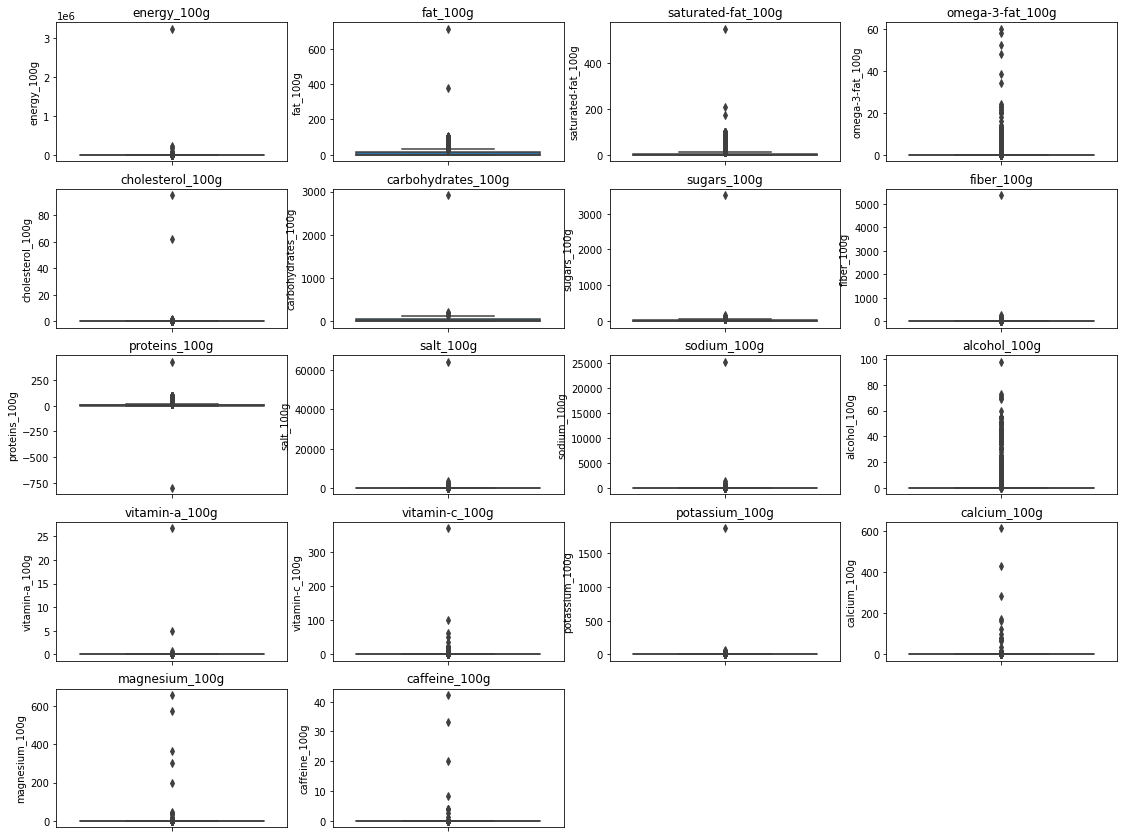

In [32]:
plt.figure(figsize=(19,24))
for i in range(1,int(len(colonnes)+1)):
    plt.subplot(int(len(colonnes)-1)/2, 4, i)
    sns.boxplot(y=colonnes[i-1], data=df)
    plt.title(colonnes[i-1])

    #plt.text(0.5, 0.5, str((2, 3, i)),
      #fontsize=18, ha='center')

### D"autres ont des valeurs dépassant les 100g ou inférieures à 0: energy_from_fat, lauric-acid_100g, arachidic acid, 

Remplacement de ces valeurs par la valeur mediane des valeurs inférieurs à 100

In [33]:
for i in colonnes:
  df.loc[(df[i] > 100), i]=df[i].mean()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


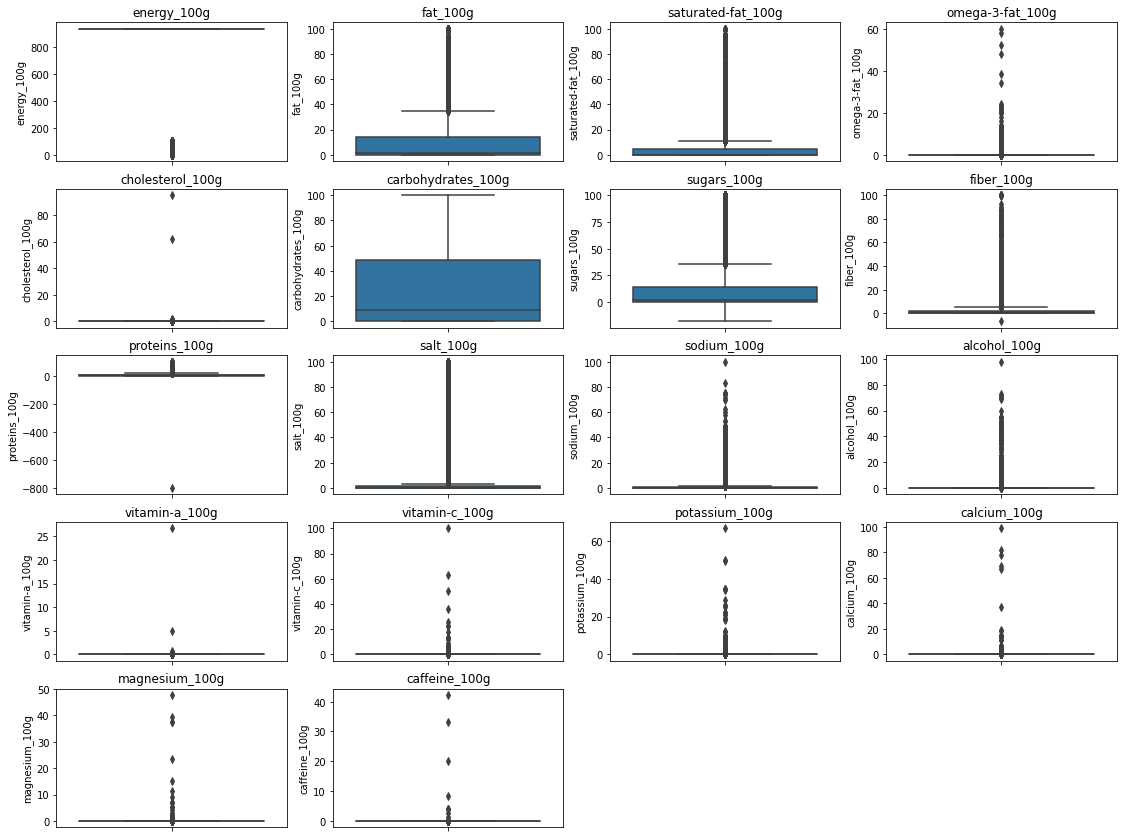

In [35]:
plt.figure(figsize=(19,24))
for i in range(1,int(len(colonnes)+1)):
    plt.subplot(int(len(colonnes)-1)/2, 4, i)
    sns.boxplot(y=colonnes[i-1], data=df)
    plt.title(colonnes[i-1])

In [36]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,omega-3-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,magnesium_100g,caffeine_100g
count,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000,201252.000000
mean,1.688629,0.020338,0.050673,717.774334,9.300905,3.747823,0.010343,0.008192,23.690014,11.799132,1.797455,5.937624,1.217928,0.493474,0.133076,0.000225,0.005745,0.019814,0.039970,0.003112,0.000603
std,2.241254,0.143007,0.264215,395.360326,15.229634,7.134993,0.365611,0.255319,28.546985,19.183945,3.967677,8.003337,5.194930,2.211608,1.748899,0.060580,0.323427,0.333053,0.439429,0.198275,0.130452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,937.491459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,937.491459,1.500000,0.210000,0.000000,0.000000,9.300000,2.500000,0.000000,3.330000,0.210000,0.082677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,937.491459,14.000000,4.500000,0.000000,0.000000,48.285000,14.170000,2.300000,8.800000,1.127760,0.444000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,2.000000,6.000000,937.491459,100.000000,100.000000,60.000000,95.238000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.900000,26.700000,100.000000,66.667000,99.006000,47.720000,42.280000


Certaines variables ont des valeurs concentré autour de leur moyenne

In [37]:
df["energy_100g"].mean()

717.7743337235056

Réaffichons les boites à moustaches

Selection des valeurs entre l'interval q1 - 1.5 * iqr et q3 + 1.5 * iqr puisqu"on considère les autres comme valeurs abbérantes

In [38]:
for i in colonnes:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)

  iqr = q3 - q1
  dessous = q1 - 1.5 * iqr
  dessus = q3 + 1.5 * iqr
  df[i].loc[(df[i] < dessous) | (df[i] >dessus)]=df[i].median()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

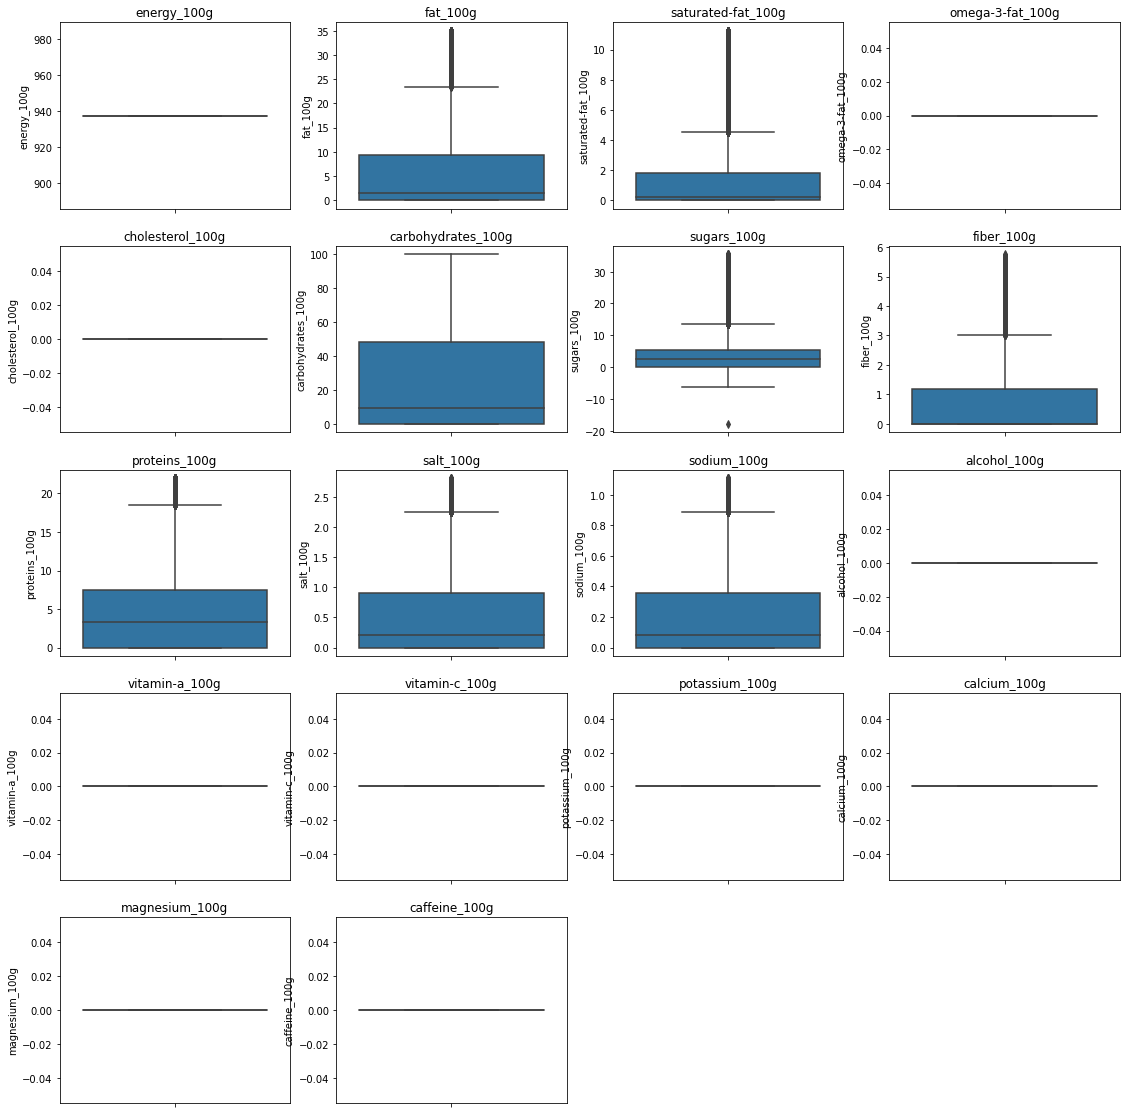

In [40]:
plt.figure(figsize=(19,24))
for i in range(1,int(len(colonnes)+1)):
    plt.subplot(6, 4, i)
    sns.boxplot(y=colonnes[i-1], data=df)
    plt.title(colonnes[i-1])

In [ ]:
print(f"apres cette etape, il nous reste {df.shape[0]} lignes et {df.shape[1]} colonnes")

apres cette etape, il nous reste 184564 lignes et 26 colonnes


Vérification de la base de données




In [41]:
df.head()

,product_name,ingredients_text,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,omega-3-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,vitamin-c_100g,potassium_100g,calcium_100g,magnesium_100g,caffeine_100g
0,Farine de blé noir,Carbonated water,1.0,0.0,0.0,d,unknown,unknown,937.491459,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Banana Chips Sweetened (Whole),Bananas,0.0,0.0,0.0,d,unknown,unknown,937.491459,28.57,0.21,0.0,0.0,64.29,14.29,3.6,3.57,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Peanuts,Peanuts,0.0,0.0,0.0,b,unknown,unknown,937.491459,17.86,0.00,0.0,0.0,60.71,17.86,0.0,17.86,0.63500,0.250,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Organic Salted Nut Mix,Organic hazelnuts,0.0,0.0,0.0,d,unknown,unknown,937.491459,1.50,5.36,0.0,0.0,17.86,3.57,0.0,17.86,1.22428,0.482,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Organic Polenta,Organic polenta,0.0,0.0,0.0,d,unknown,unknown,937.491459,1.43,0.00,0.0,0.0,77.14,0.00,5.7,8.57,0.00000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Enregistrement de la base de données sous format csv

In [42]:
df.to_csv("fooddata.csv", index=False)